In [12]:
import numpy as np 
import seaborn as snb
import matplotlib.pyplot as plt


In [2]:
import pandas as pd

data=pd.read_excel("C:\\Users\\Soundarya\\Downloads\\BlinkIT Grocery Data Excel.xlsx")


In [3]:
data.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [4]:
data.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
data.shape

(8523, 12)

In [11]:
data.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.643456,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [14]:
data.drop_duplicates(inplace=True)

In [15]:
data.fillna(0, inplace=True)

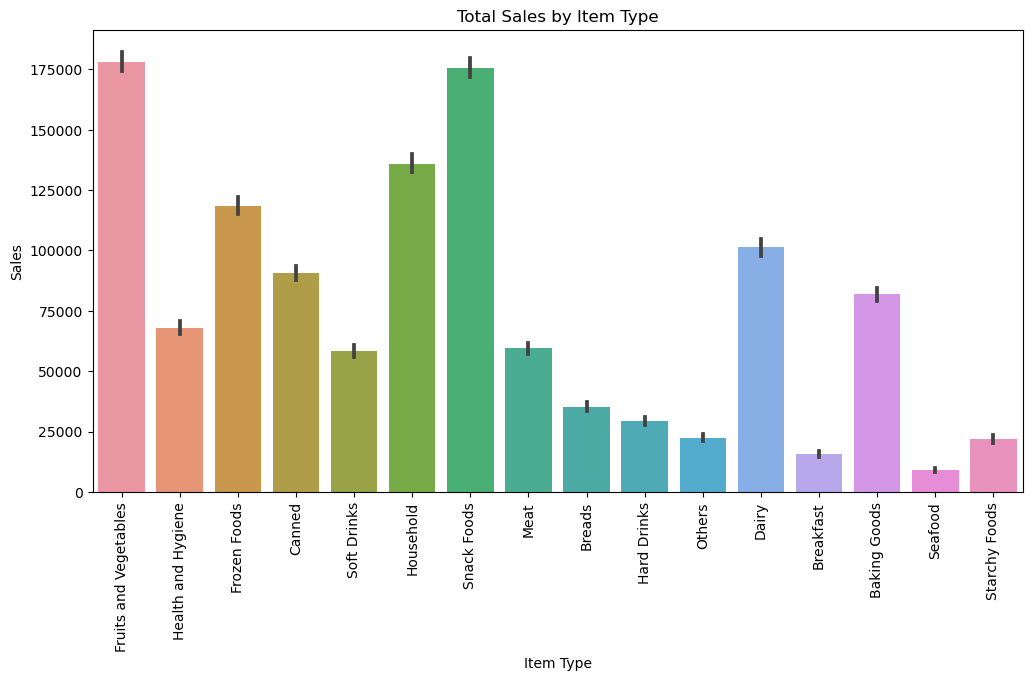

In [20]:
plt.figure(figsize=(12,6))
snb.barplot(x="Item Type", y="Sales", data=data, estimator=sum)
plt.xticks(rotation=90)
plt.title("Total Sales by Item Type")
plt.show()

In [22]:
data['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [23]:
data['Item Fat Content']=data['Item Fat Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [24]:
data['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [42]:
print("Total sales:$",round(data['Sales'].sum(),2))

Total sales:$ 1201681.49


In [39]:
print(f"Average Sales:${data['Sales'].mean():.0f}")

Average Sales:$141


In [29]:
print("Number of Items Sold:",data['Sales'].count())

Number of Items Sold: 8523


In [38]:
print("Average Ratings:",round(data['Rating'].mean(),2))

Average Ratings: 3.97


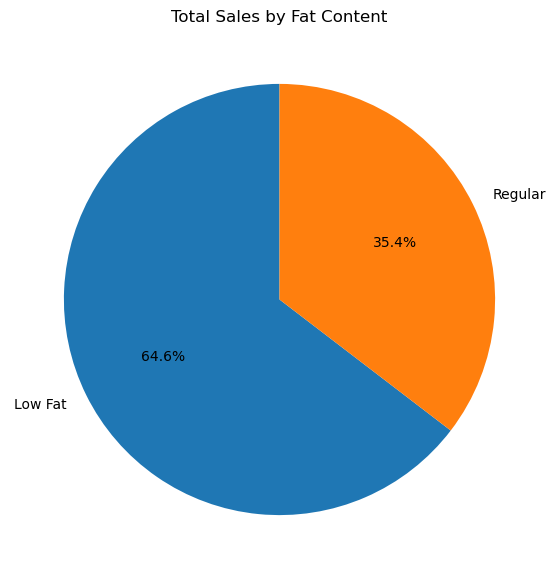

In [46]:
sales_by_fat = data.groupby("Item Fat Content")["Sales"].sum()
plt.figure(figsize=(7,7))
plt.pie(
    sales_by_fat,
    labels=sales_by_fat.index,
    autopct='%1.1f%%',
    startangle=90,
    #wedgeprops={'width':0.4}  # This makes it a donut instead of pie
)

plt.title("Total Sales by Fat Content")
plt.show()

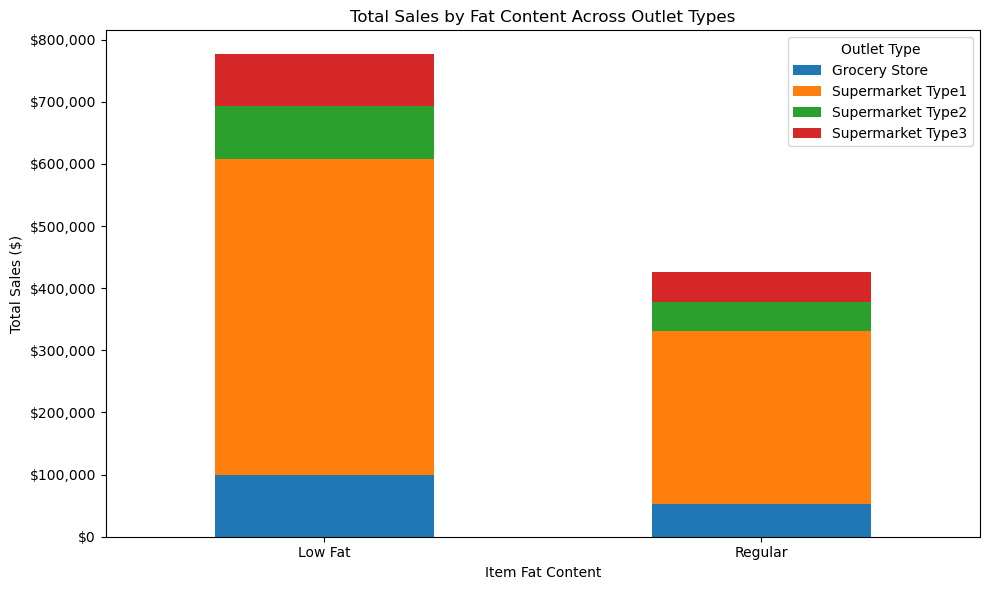

In [50]:
import matplotlib.ticker as mtick
sales_stacked = data.pivot_table(
    index="Item Fat Content",
    columns="Outlet Type",
    values="Sales",
    aggfunc="sum"
)
ax = sales_stacked.plot(kind="bar", stacked=True, figsize=(10,6))

ax.set_title("Total Sales by Fat Content Across Outlet Types")
ax.set_ylabel("Total Sales ($)")
ax.set_xlabel("Item Fat Content")
plt.xticks(rotation=0)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.legend(title="Outlet Type")
plt.tight_layout()
plt.show()

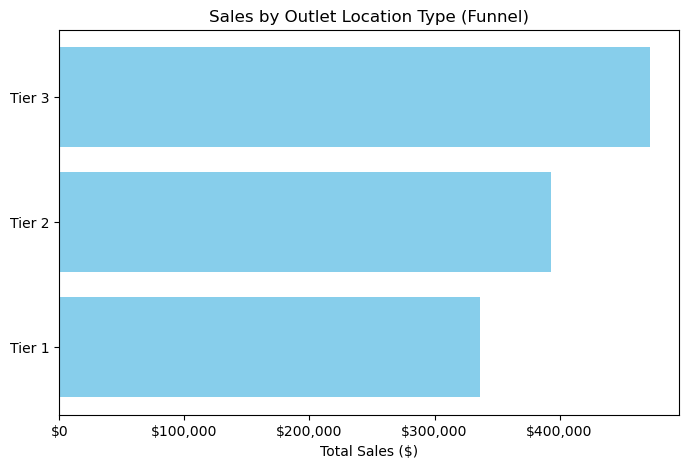

In [51]:
#funnel
sales_location = data.groupby("Outlet Location Type")["Sales"].sum().sort_values(ascending=False)


plt.figure(figsize=(8,5))
plt.barh(sales_location.index, sales_location.values, color="skyblue")
plt.gca().invert_yaxis()  # largest on top
plt.xlabel("Total Sales ($)")
plt.title("Sales by Outlet Location Type (Funnel)")
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.show()

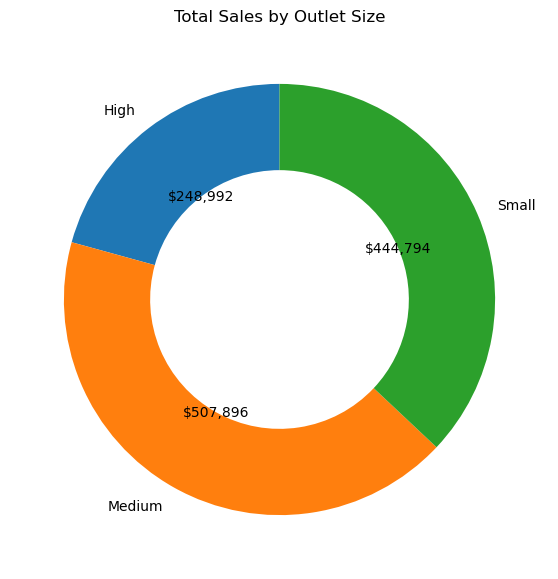

In [52]:
sales_size = data.groupby("Outlet Size")["Sales"].sum()

# Donut chart
plt.figure(figsize=(7,7))
plt.pie(
    sales_size,
    labels=sales_size.index,
    autopct=lambda p: f"${p*sum(sales_size)/100:,.0f}",
    startangle=90,
    wedgeprops={'width':0.4}  # remove this for pie chart
)
plt.title("Total Sales by Outlet Size")
plt.show()

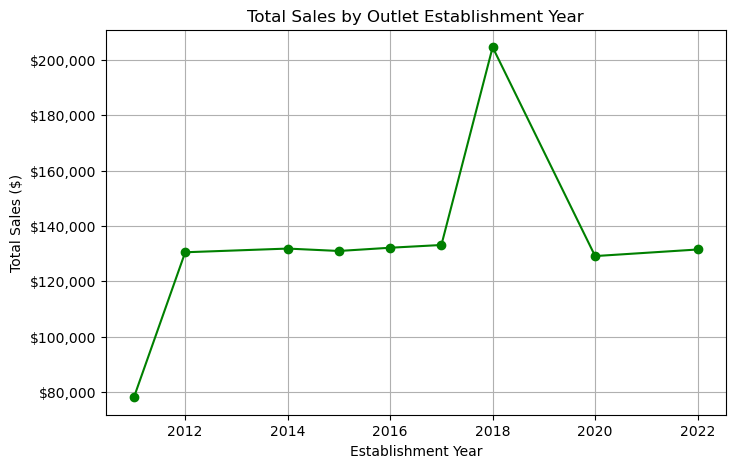

In [53]:
sales_year = data.groupby("Outlet Establishment Year")["Sales"].sum()

plt.figure(figsize=(8,5))
plt.plot(sales_year.index, sales_year.values, marker="o", color="green")
plt.title("Total Sales by Outlet Establishment Year")
plt.xlabel("Establishment Year")
plt.ylabel("Total Sales ($)")
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.grid(True)
plt.show()